In [6]:
#this will be the code for the analytical current calculation as detailed in the pdr for advitiy
#this will do it for one control cycle whcih lasts 2 secs, pwm cycle is 1ms
#assuming duty cycle of 50% for the voltage
import math
import matplotlib.pyplot as plt
import numpy as np

V = 3.3   #high voltage
R = 42    #resistance 
L = 0.068
pwm_T = 10**-3
pwm_on = 5*10**-4
control_T = 2

In [22]:
#start with initial 
I = np.zeros((3, int(control_T/pwm_T)))
pwm = np.zeros((3, int(control_T/pwm_T)))
for i in range(int(control_T/pwm_T)):    #redundancy but it helps to save voltages in an numpy array, we could just use V directly in the next loop as we are checking for i%2 anyways
    if i%2 == 1:
        pwm[0][i] = V 
        pwm[1][i] = V
        pwm[2][i] = V

for i in range(2, int(control_T/pwm_T)):
    if i%2 == 0:
        I[0][i] = (pwm[0][i - 1] - I[0][i - 1]*R)*(1 - math.exp(-1*R*pwm_on/L))/R + I[0][i-1]
        I[1][i] = (pwm[1][i - 1] - I[1][i - 1]*R)*(1 - math.exp(-1*R*pwm_on/L))/R + I[1][i-1]
        I[2][i] = (pwm[2][i - 1] - I[2][i - 1]*R)*(1 - math.exp(-1*R*pwm_on/L))/R + I[2][i-1]
    else :
        I[0][i] = (I[0][i - 1])*(math.exp(-1*R*(pwm_T-pwm_on)/L))
        I[1][i] = (I[1][i - 1])*(math.exp(-1*R*(pwm_T-pwm_on)/L))
        I[2][i] = (I[2][i - 1])*(math.exp(-1*R*(pwm_T-pwm_on)/L))

print(I)

[[0.         0.         0.02087562 ... 0.03326729 0.04530413 0.03326729]
 [0.         0.         0.02087562 ... 0.03326729 0.04530413 0.03326729]
 [0.         0.         0.02087562 ... 0.03326729 0.04530413 0.03326729]]


1.4337413281093636e-05
0.00014293183004669707
0.0002707335569484465
0.0003977474803355049
0.0005239784564362898
0.0006494313115441462
0.0007741108422018705
0.0008980218153851126
0.001021168968684629
0.0011435570104874084
0.0012651906201567112
0.0013860744482109707
0.0015062131165015935
0.0016256112183896795
0.0017442733189216397
0.00186220395500374
0.0019794076355755556
0.002095888841782369
0.0022116520271465087
0.002326701617737618
0.002441042012341875
0.0025546775826301845
0.0026676126733253223
0.0027798516023680437
0.002891398661082183
0.0030022581143387198
0.003112434200718851
0.00322193113267604
0.003330753096697076
0.0034389042534621376
0.003546388738003887
0.0036532106598655386
0.0037593741032580135
0.003864883127216072
0.003969741765753524
0.004073954028017441
0.00417752389844147
0.004280455336898156
0.00438275227885034
0.00448441863550164
0.0045854582939459775
0.004685875117316212
0.004785672944931826
0.004884855592445731
0.004983426851990145
0.0050813904923215905
0.0051787502

<function matplotlib.pyplot.show(close=None, block=None)>

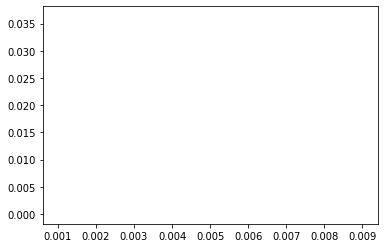

In [21]:
I_plt = []

for t in np.linspace(0, 0.009, 900):
    x = int(t/0.001)
    y = t%0.001
    if x%2==1:
        I_plt = np.append(I_plt, (I[0][x+1] - I[0][x])*(1 - math.exp(-1*R*y/L)) + I[0][x])
        plt.plot(t,(I[0][x+1] - I[0][x])*(1 - math.exp(-1*R*y/L)) + I[0][x])
        print((I[0][x+1] - I[0][x])*(1 - math.exp(-1*R*y/L)) + I[0][x])
    else:
        I_plt = np.append(I_plt, (I[0][x] - I[0][x+1])*(math.exp(-1*R*y/L)) + I[0][x]) + I[0][x+1]

t = np.linspace(0, 0.009, 900)   
#plt.plot(t, I_plt)
plt.show 
#print(I_plt)